# Data Science Modelling for Space Dataset

---
Steps:
1. Data Cleaning and PreProcessing
2. Analysis
3. Modelling
4. Review


In [1]:
# Import Files
import pandas as pd

In [2]:
train_filepath = 'train.csv'
df = pd.read_csv(train_filepath)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


---

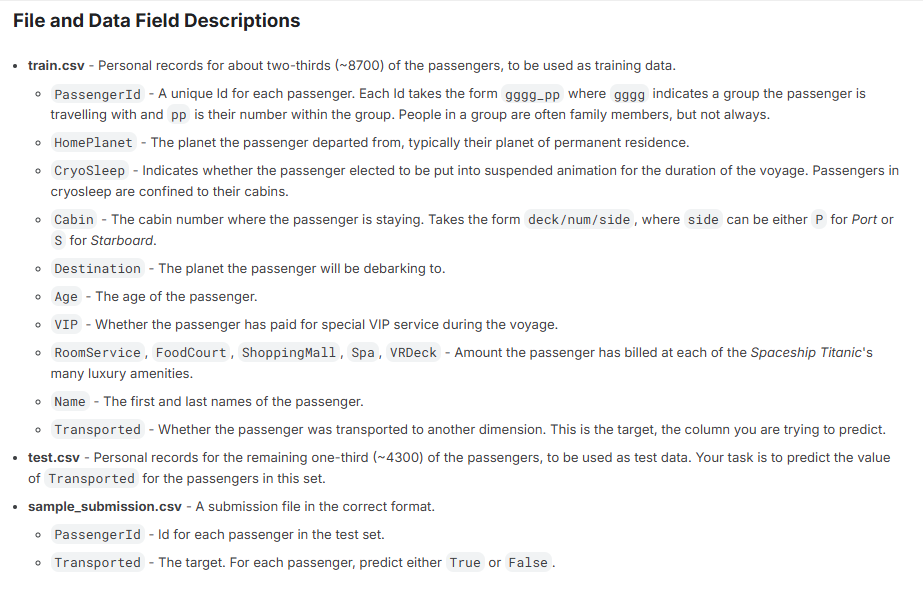

---
# Data CLeaning 

1. Available Data Types?
2. Which data features are numerical/categorical?
3. None, Blank and Empty values?


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


---


In [4]:
print('Categorical Columns in dataframe')
categorical_variables = df.select_dtypes(include=['object']).columns
for col in categorical_variables:
    print(col)

Categorical Columns in dataframe
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [5]:
print('Numerical Columns in dataframe')
numerical_variables = df.select_dtypes(include='number').columns
for col in numerical_variables:
    print(col)

Numerical Columns in dataframe
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


---


In [6]:
for col in df.columns:
    percentage_values = str(round(df[col].isna().sum()*100/len(df), 2)) + '%'
    print(col ,' - ', df[col].isna().sum(), ' - ', percentage_values)

PassengerId  -  0  -  0.0%
HomePlanet  -  201  -  2.31%
CryoSleep  -  217  -  2.5%
Cabin  -  199  -  2.29%
Destination  -  182  -  2.09%
Age  -  179  -  2.06%
VIP  -  203  -  2.34%
RoomService  -  181  -  2.08%
FoodCourt  -  183  -  2.11%
ShoppingMall  -  208  -  2.39%
Spa  -  183  -  2.11%
VRDeck  -  188  -  2.16%
Name  -  200  -  2.3%
Transported  -  0  -  0.0%


In [7]:
df.shape

(8693, 14)

For Handling Categorical Null values
- Fill it with the most common value

For Handling Numerical Null values
- Fill it with the mean value

In [8]:
for col in categorical_variables:
    if col != 'Name':
        df.fillna({col: df[col].mode()[0]}, inplace=True)

df.isna().sum()

C:\Users\kumar\AppData\Local\Temp\ipykernel_5600\1954158382.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna({col: df[col].mode()[0]}, inplace=True)


PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
for col in numerical_variables:
    df.fillna({col: df[col].mode()[0]}, inplace=True)

df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

---
# Now the data is clean and we can move to pre-processing

# Pre-Processing and Analysis
1. Data Exploration
2. Feature Engineering
3. Data Visualization


### Data Exploration

In [10]:
df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8693,8693,8693,8693,8693.000000,8693,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Anton Woody,True
freq,1,4803,5656,207,6097,NaN,8494,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.728517,NaN,220.009318,448.434027,169.572300,304.588865,298.261820,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.355438,NaN,660.519050,1595.790627,598.007164,1125.562559,1134.126417,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,41.000000,61.000000,22.000000,53.000000,40.000000,NaN,NaN


In [11]:
df.drop(columns='Name', inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


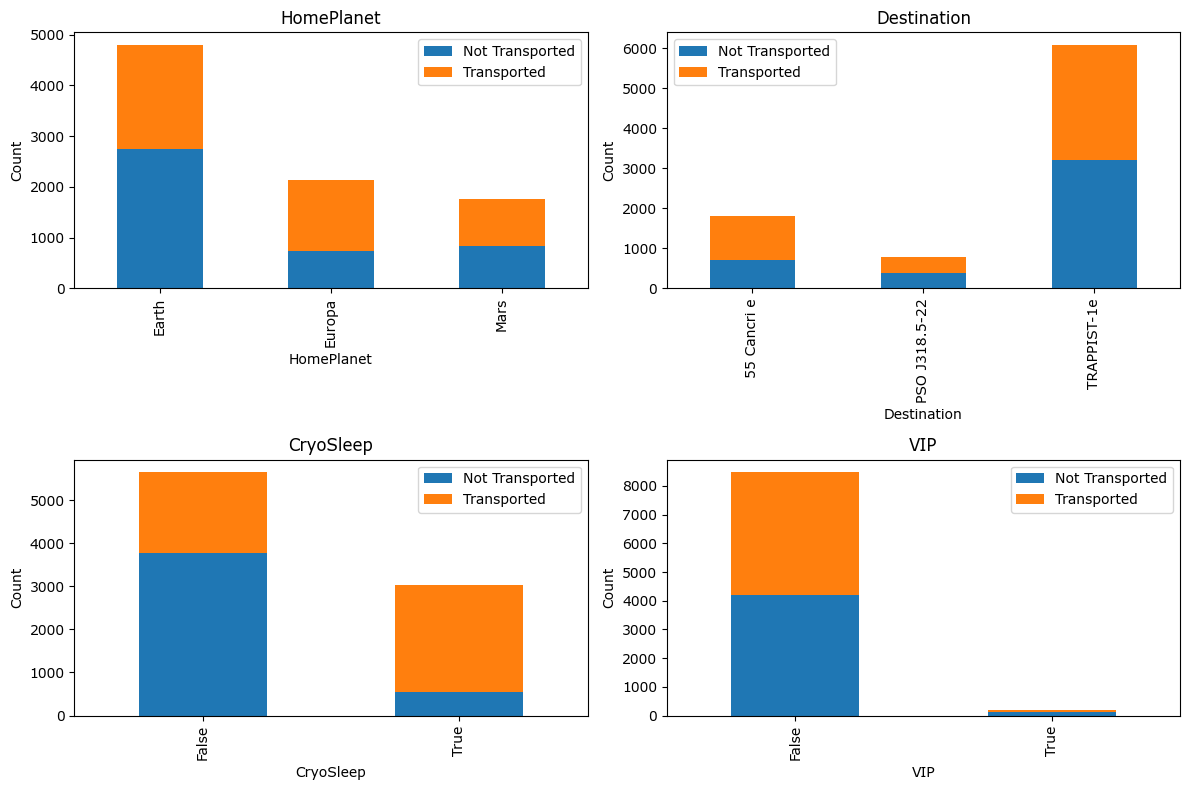

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 

categorical_variables = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']
transport_list = []
for ax, col in zip(axes.flatten(), categorical_variables):
    transport_counts = df.groupby(col)['Transported'].value_counts().unstack()
    transport_list += [transport_counts]
    transport_counts.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(col)
    ax.set_ylabel("Count")
    ax.legend(["Not Transported", "Transported"])

plt.tight_layout()
plt.show()


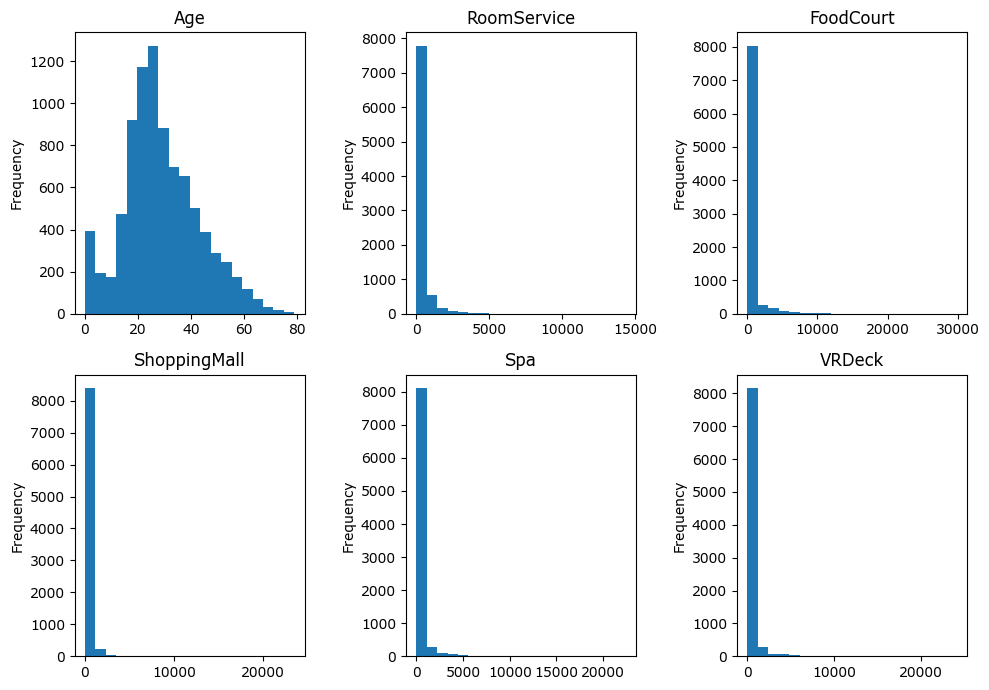

In [13]:
plt.figure(figsize=(10,7))
for i,num_col in enumerate(numerical_variables):
    plt.subplot(2,3,i+1)
    df[num_col].plot(kind='hist', bins=20)
    plt.title(num_col)
plt.tight_layout()

---
## Feature Engineering

In [14]:
df['Destination'].value_counts()

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [15]:
spending_col = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df['Total_Spending'] = df[spending_col].sum(axis=1).astype(int)
df.drop(columns=spending_col, inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,Total_Spending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True,736
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False,10383
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False,5176
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True,1091


In [16]:
df['HomePlanet'] = df['HomePlanet'].map({'Earth': 0, 'Europa': 1, 'Mars': 2}).astype(int)
df['Destination'] = df['Destination'].map({'TRAPPIST-1e': 0, '55 Cancri e': 1, 'PSO J318.5-22': 2}).astype(int)
df['CryoSleep'] = df['CryoSleep'].map({False: 0, True: 1}).astype(int)
df['VIP'] = df['VIP'].map({False: 0, True: 1}).astype(int)
df['Transported'] = df['Transported'].map({False: 0, True: 1}).astype(int)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,Total_Spending
0,0001_01,1,0,B/0/P,0,39.0,0,0,0
1,0002_01,0,0,F/0/S,0,24.0,0,1,736
2,0003_01,1,0,A/0/S,0,58.0,1,0,10383
3,0003_02,1,0,A/0/S,0,33.0,0,0,5176
4,0004_01,0,0,F/1/S,0,16.0,0,1,1091


In [17]:
df['Age'] = df['Age'].astype(int)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,Total_Spending
0,0001_01,1,0,B/0/P,0,39,0,0,0
1,0002_01,0,0,F/0/S,0,24,0,1,736
2,0003_01,1,0,A/0/S,0,58,1,0,10383
3,0003_02,1,0,A/0/S,0,33,0,0,5176
4,0004_01,0,0,F/1/S,0,16,0,1,1091


In [18]:
df[['Deck','Num','Side']] = df['Cabin'].str.split('/', expand=True)
df.drop(columns=['Cabin'], inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Total_Spending,Deck,Num,Side
0,0001_01,1,0,0,39,0,0,0,B,0,P
1,0002_01,0,0,0,24,0,1,736,F,0,S
2,0003_01,1,0,0,58,1,0,10383,A,0,S
3,0003_02,1,0,0,33,0,0,5176,A,0,S
4,0004_01,0,0,0,16,0,1,1091,F,1,S


In [19]:
df['Side'].value_counts()

Side
S    4487
P    4206
Name: count, dtype: int64

In [20]:
df['Deck'] = df['Deck'].map({'F': 0, 'G': 1, 'E': 2, 'B': 3, 'C': 4, 'D': 5, 'A': 6, 'T': 7}).astype(int)
df['Side'] = df['Side'].map({'S': 0, 'P': 1}).astype(int)
df.head()


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Total_Spending,Deck,Num,Side
0,0001_01,1,0,0,39,0,0,0,3,0,1
1,0002_01,0,0,0,24,0,1,736,0,0,0
2,0003_01,1,0,0,58,1,0,10383,6,0,0
3,0003_02,1,0,0,33,0,0,5176,6,0,0
4,0004_01,0,0,0,16,0,1,1091,0,1,0


In [21]:
df.drop(columns=['PassengerId'], inplace=True)

---
## Visualization


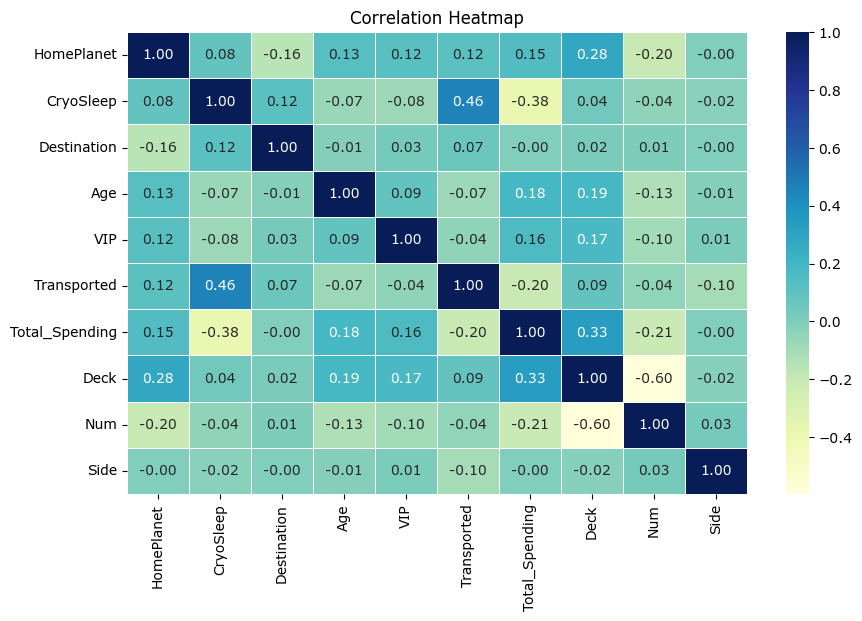

In [22]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

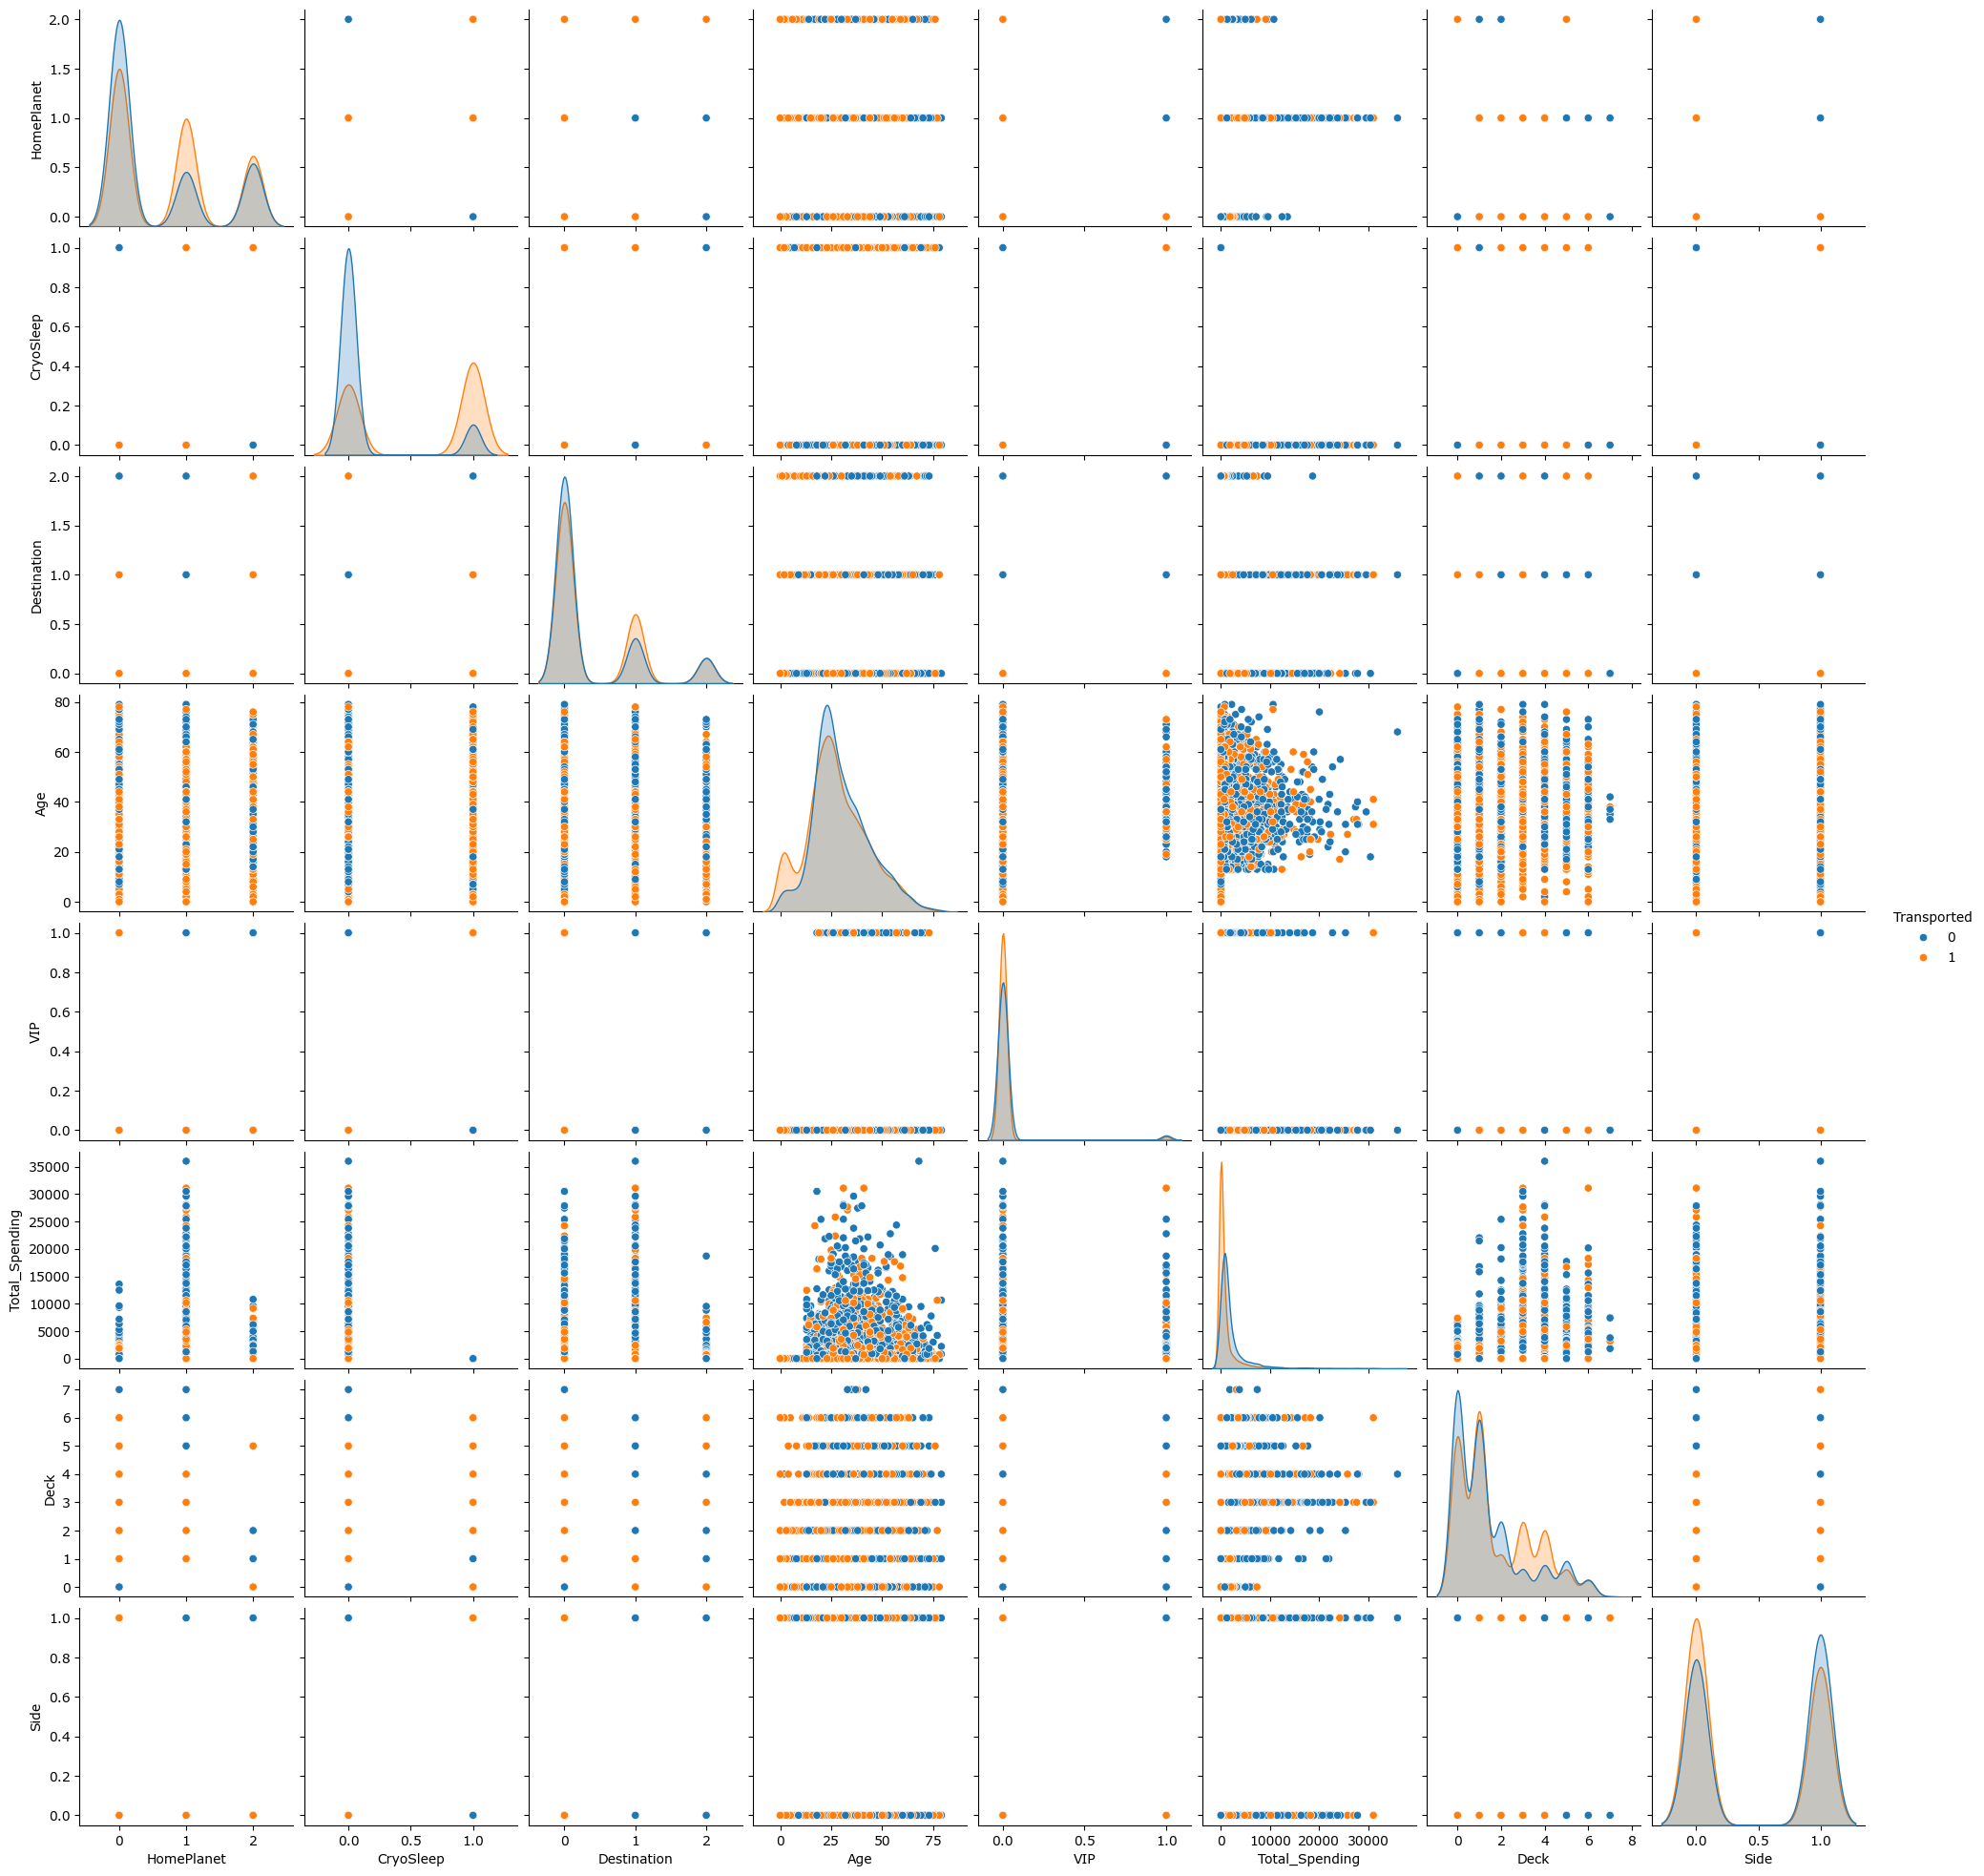

In [23]:
sns.pairplot(df, hue="Transported", diag_kind="kde")
plt.show()

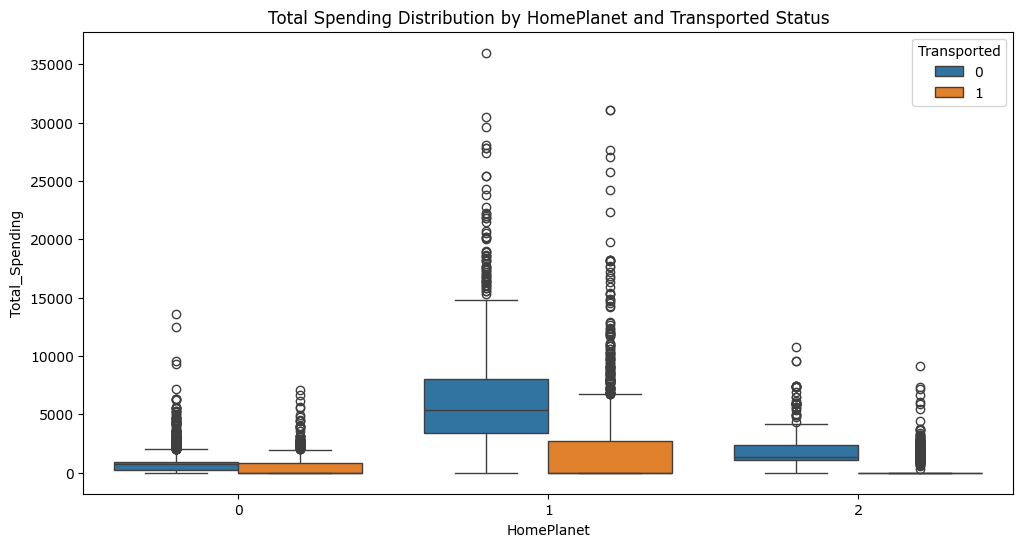

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="HomePlanet", y="Total_Spending", hue="Transported", data=df)
plt.title("Total Spending Distribution by HomePlanet and Transported Status")
plt.show()


In [25]:

df_train = df

---
# Model Training

1. Train test split of our training data
2. Fit a few models: Logistic Regression, Random Forest, Gradient Boosting
3. Plot the results
4. Pick a winner
5. Submit our predictions

In [26]:
from sklearn.model_selection import train_test_split
X = df_train.drop("Transported", axis=1).values
y = df_train["Transported"].values

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((6954, 9), (6954,), (1739, 9), (1739,))

In [28]:

from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_pred_score = lg.score(X_test,y_test)

C:\Users\kumar\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred_score = rf.score(X_test,y_test)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred_score = gb.score(X_test,y_test)

In [31]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc_pred_score = svc.score(X_test,y_test)

In [43]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred_score = xgb.score(X_test,y_test)

In [45]:
new_df = pd.DataFrame(dict(model=['Logistic Regression', 'Random Forest', 'Gradient Boosting','SVM','XGB'],accuracy=[lg_pred_score, rf_pred_score, gb_pred_score, svc_pred_score, xgb_pred_score]))
new_df

,model,accuracy
0,Logistic Regression,0.719379
1,Random Forest,0.748706
2,Gradient Boosting,0.753306
3,SVM,0.736055
4,XGB,0.753306


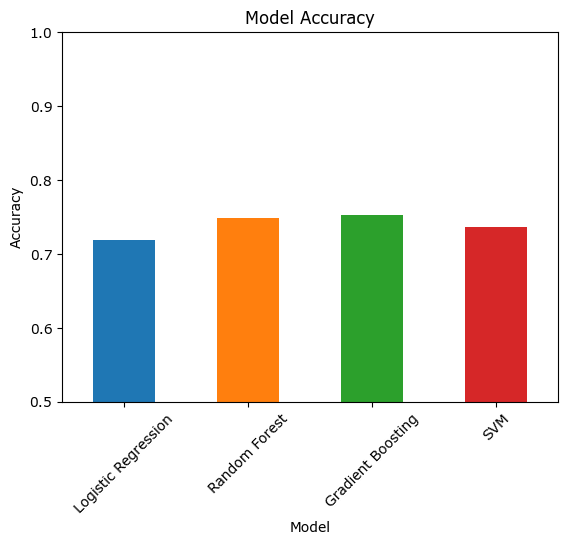

In [40]:
new_df.plot(kind='bar', x='model', y='accuracy', title='Model Accuracy', legend=False, 
            color=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728'])  # Added 4th color

plt.ylim(0.5, 1)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()
